Name: plot_llj.ipynb

Author: Robert M. Frost

NOAA Global Systems Laboratory

Created: 20 July 2023

Purpose: Plot 700 mb winds and geopotential height

In [22]:
from UFSutils import read_grib
import matplotlib.pyplot as plt
from matplotlib import rc
import cartopy.crs as ccrs
import cartopy.feature as cpf
import seaborn
import numpy as np
import geopandas as gpd
from matplotlib.cm import get_cmap

Important parameters

In [23]:
# hour of interest
hr = 9
# hour forecast was initialized (UTC)
init = 12
# date being plot
date = "2023041912"
# directory where hrrr grib data are located
dgrib_h = f"/scratch2/BMC/fv3lam/Robby.Frost/expt_dirs/{date}_3km_hrrrphys/{date}/postprd/"
# directory where rap grib data are located
dgrib_r = f"/scratch2/BMC/fv3lam/Robby.Frost/expt_dirs/{date}_3km_rapphys/{date}/postprd/"
# natlev or prslev
nat_prs = "prslev"
# message number for geopotential height
mn_geo = 573
# message number for 700 mb U
mn_u = 580
# message number for 700 mb V
mn_v = 581
# directory for figure to be output
figdir = f"/scratch2/BMC/fv3lam/Robby.Frost/figures/{date}/upper_air/"

Plotting set up

In [24]:
rc('font',weight='normal',size=12.5)
# rc('text',usetex='True')
rc('figure',facecolor='white')

Read in data

In [25]:
# geopotential height
hrrr, geo_h, lat, lon, valid_date = read_grib(init, hr, dgrib_h, nat_prs, mn_geo, ret_type=0)
rap, geo_r, lat, lon, valid_date = read_grib(init, hr, dgrib_r, nat_prs, mn_geo, ret_type=0)
# u
u_h = hrrr[mn_u].values
u_r = rap[mn_u].values
# v
v_h = hrrr[mn_v].values
v_r = rap[mn_v].values

Reading in /scratch2/BMC/fv3lam/Robby.Frost/expt_dirs/2023041912_3km_hrrrphys/2023041912/postprd/rrfs.t12z.prslev.f009.rrfs_conuscompact_3km.grib2
Finished reading in Geopotential height
Reading in /scratch2/BMC/fv3lam/Robby.Frost/expt_dirs/2023041912_3km_rapphys/2023041912/postprd/rrfs.t12z.prslev.f009.rrfs_conuscompact_3km.grib2
Finished reading in Geopotential height


Convert wind to knots

In [26]:
u_h = u_h * 1.944
u_r = u_r * 1.944
v_h = v_h * 1.944
v_r = v_r * 1.944

Calculate windspeed

In [27]:
wspd_h = (u_h ** 2 + v_h ** 2) ** (1/2)
wspd_r = (u_r ** 2 + v_r **2) ** (1/2)

Plot dew point comparison

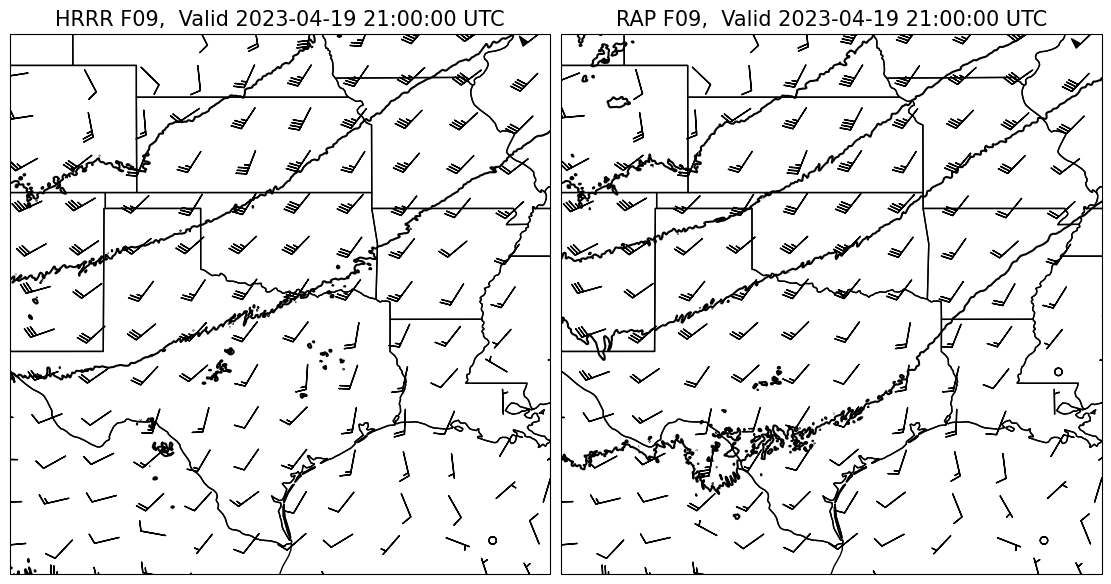

In [32]:
# create plot
fig, ax = plt.subplots(ncols=2, subplot_kw={'projection': ccrs.PlateCarree()}, 
                    figsize=(11,6), constrained_layout=True)

# plot HRRR
c0 = ax[0].contour(lon, lat, geo_h.values,
                    transform=ccrs.PlateCarree(), colors="black")
# plot RAP
c1 = ax[1].contour(lon, lat, geo_r.values,
                    transform=ccrs.PlateCarree(), colors="black")

# mapping
plt_area = [-106, -89, 25, 42] # W, E, S, N
for i, iax in enumerate(ax):
    iax.coastlines()
    iax.add_feature(cpf.BORDERS)
    iax.add_feature(cpf.STATES)
    iax.set_extent(plt_area)

# set title
ax[0].set_title(f"HRRR F0{hr},  Valid {valid_date} UTC")
ax[1].set_title(f"RAP F0{hr},  Valid {valid_date} UTC")

# Wind barbs
spacing=50 #barbspacing (smaller if zoomed in)
ax[0].barbs(lon[::spacing,::spacing], lat[::spacing,::spacing],
            u_h[::spacing,::spacing], v_h[::spacing,::spacing], 
            length=6)
ax[1].barbs(lon[::spacing,::spacing], lat[::spacing,::spacing],
            u_r[::spacing,::spacing], v_r[::spacing,::spacing], 
            length=6)

# save and close figure
# figdir_full = f"{figdir}td2m_sidebyside_f{hr}.png"
# plt.savefig(figdir_full)
plt.show()
plt.close()